Data Description:
The data contains features extracted from the silhouette of vehicles in different angles. Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.
Context:
The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.
Objective:
Apply dimensionality reduction technique – PCA and train a model using principle components instead of training the model using just the raw data.

In [1]:
# Utilities
from time import time

# Numerical calculation
import numpy as np

# Data handling
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Sample and parameter tuning
from sklearn.model_selection import train_test_split, GridSearchCV

# Predictive Modeling
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

# Feature Engineering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Evaluation metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score, precision_recall_curve

In [2]:
# Load the dataset
vehicle = pd.read_csv('vehicle.csv')

In [3]:
# Check the head of the dataset
vehicle.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [4]:
##Data pre-processing

In [5]:
# Get the shape and size of the dataset
vehicle.shape

(846, 19)

In [6]:
# Get more info on it
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

The dataset comprises of 846 rows and 19 columns
All the input features are numerics of type integer or float. Only the class/target feature is of type object, as it is categorical in nature. There are a few NULL values.

In [7]:
# Find out the null value counts in each column
vehicle.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

There are 14 features having NULL values in their distribution

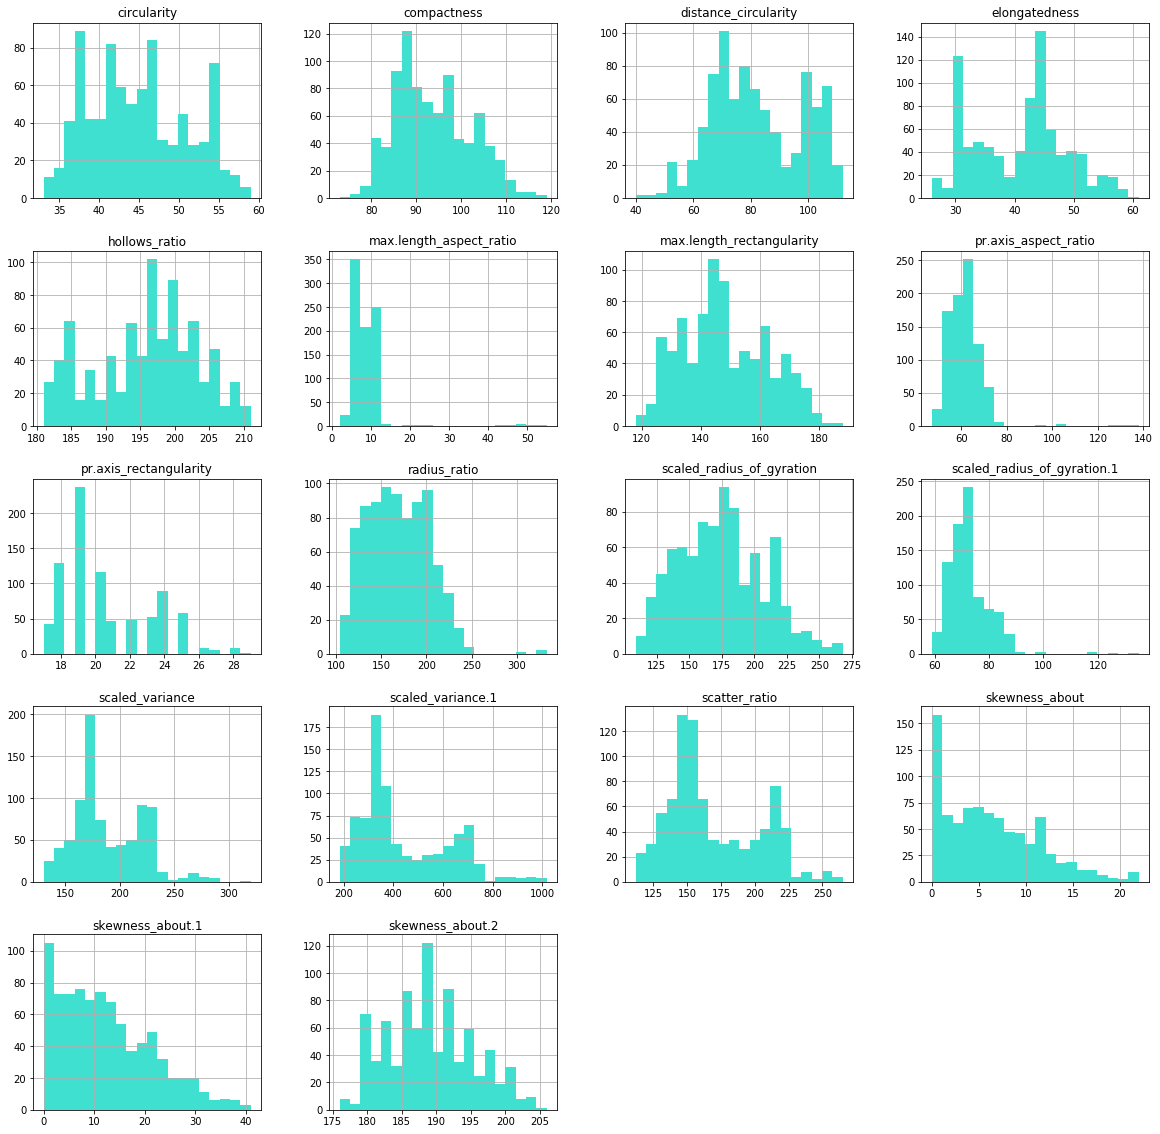

In [8]:
# Individual distribution histogram
_=vehicle.hist(figsize=(20,20), bins=20, color='turquoise')

NULL Treatement
As there are 3 different vehicle types present in the dataset, we will be replacing the NaN values in each feature with the median from their respective class types.

In [9]:
# Split the dataset according to their class types
unique_vehicles = [vehicle[vehicle['class'] == veh] for veh in vehicle['class'].unique()]

# Replaces the NULLs with the median of the respective feature
for unique_veh in unique_vehicles:
    for col in unique_veh.columns[:-1]:
        median = unique_veh[col].median()
        unique_veh[col] = unique_veh[col].fillna(median) 
         
# Join the splitted datasets back together and sort the index
vehicle = pd.concat(unique_vehicles).sort_index()

C:\Users\welcome\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
# Check the dataset after NULL treatment
vehicle.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [11]:
# Describe the dataset with various other summary and statistics
vehicle.describe().T

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  846.0   44.826241    6.134340   33.0   40.00   
distance_circularity         846.0   82.066194   15.754263   40.0   70.00   
radius_ratio                 846.0  168.916076   33.427561  104.0  141.00   
pr.axis_aspect_ratio         846.0   61.680851    7.882557   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                846.0  168.920804   33.199802  112.0  147.00   
elongatedness                846.0   40.927896    7.813401   26.0   33.00   
pr.axis_rectangularity       846.0   20.579196    2.590879   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              846.0  188.643026   31.378020  130.0  167.00   
scaled_variance.1            846.0  439.665485  176.492876  184.0  318.25   
scaled_radius_of_gyration    846.0  174.712766   32.546284  109.0  149.00   
scaled_radius_of_gyration.1  846.0   72.443262    7.470873   59.0   67.00   
skewness_about               846.0    6.356974    4.904073    0.0    2.00   
skewness_about.1             846.0   12.604019    8.930921    0.0    5.00   
skewness_about.2             846.0  188.919622    6.152167  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                                50%     75%     max  
compactness                   93.00  100.00   119.0  
circularity                   44.00   49.00    59.0  
distance_circularity          80.00   98.00   112.0  
radius_ratio                 167.25  195.00   333.0  
pr.axis_aspect_ratio          61.00   65.00   138.0  
max.length_aspect_ratio        8.00   10.00    55.0  
scatter_ratio                157.00  198.00   265.0  
elongatedness                 43.00   46.00    61.0  
pr.axis_rectangularity        20.00   23.00    29.0  
max.length_rectangularity    146.00  159.00   188.0  
scaled_variance              179.00  217.00   320.0  
scaled_variance.1            364.00  586.75  1018.0  
scaled_radius_of_gyration    174.00  198.00   268.0  
scaled_radius_of_gyration.1   71.00   75.00   135.0  
skewness_about                 6.00    9.00    22.0  
skewness_about.1              11.00   19.00    41.0  
skewness_about.2             188.00  193.00   206.0  
hollows_ratio                197.00  201.00   211.0

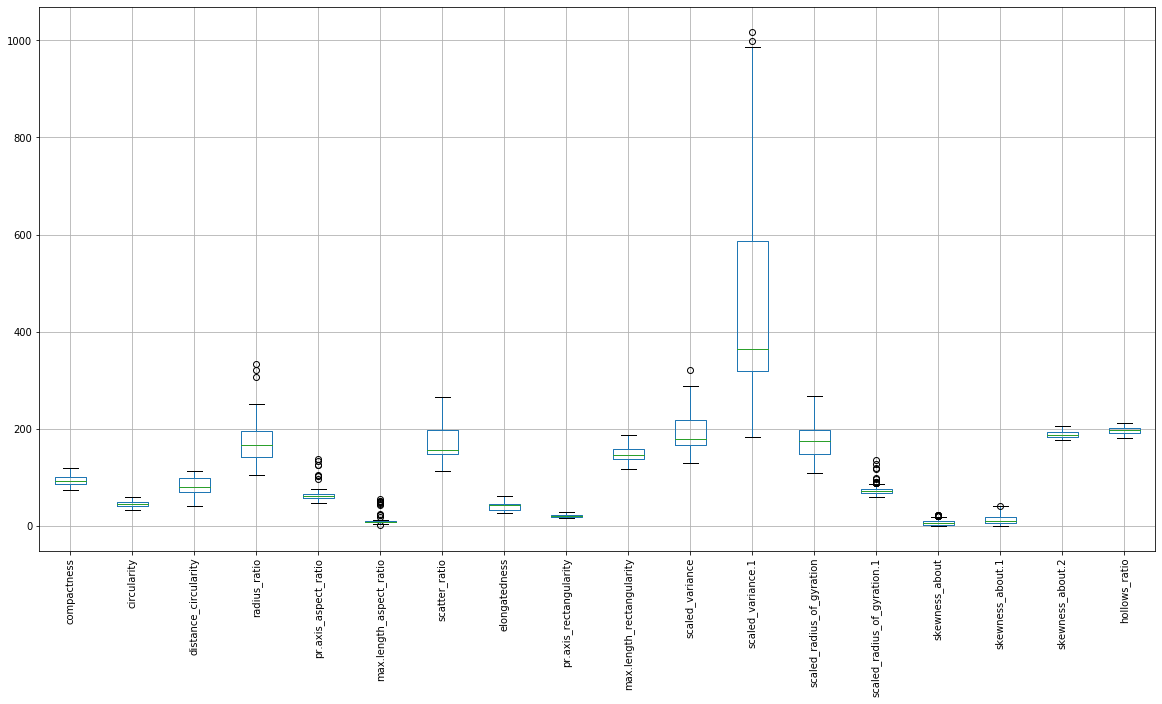

In [12]:
# Plot the central tendency of the dataset
_, bp = vehicle.boxplot(return_type='both', figsize=(20,10), rot='vertical')

fliers = [flier.get_ydata() for flier in bp["fliers"]]
boxes = [box.get_ydata() for box in bp["boxes"]]
caps = [cap.get_ydata() for cap in bp['caps']]
whiskers = [whiskers.get_ydata() for whiskers in bp["whiskers"]]

In [13]:
# Count the number of outlier data points present in each feature
for idx, col in enumerate(vehicle.columns[:-1]):
    print(col, '--', len(fliers[idx]))

compactness -- 0
circularity -- 0
distance_circularity -- 0
radius_ratio -- 3
pr.axis_aspect_ratio -- 8
max.length_aspect_ratio -- 13
scatter_ratio -- 0
elongatedness -- 0
pr.axis_rectangularity -- 0
max.length_rectangularity -- 0
scaled_variance -- 1
scaled_variance.1 -- 2
scaled_radius_of_gyration -- 0
scaled_radius_of_gyration.1 -- 15
skewness_about -- 12
skewness_about.1 -- 1
skewness_about.2 -- 0
hollows_ratio -- 0


radius_ratio and scaled_variances have a wide spread of data as indicated by the large difference of min and max values of their distribution.
Large difference between min and 1st quartile and/or 3rd quartile and max values indicates potential outliers. Hence radius_ratio,pr.axis_aspect_ratio, max.length_aspect_ratio, scaled_variance, scaled_variance.1, scaled_radius_of_gyration.1, skewness_about, skewness_about.1 features contain outliers.
min value 0 of skewness_about, skewness_about.1 indicates these two features contain 0s in their distribution.

Outlier Treatement:
Min/Max Replacement: There are 8 features present in the dataset which contains outliers. Outliers will be replaced by their nearest whisker ends in the central tendency. Means datapoints which are $1.5*IQR$ below the $Q_1$ will be replaced by min of lower whisker and which are $1.5*IQR$ above the $Q_3$ will be replaced by max of higher whisker.

In [14]:
# Treat the outlier data points
for idx, col in enumerate(vehicle.columns[:-1]):
    q1 = vehicle[col].quantile(0.25)
    q3 = vehicle[col].quantile(0.75)
    low = q1 - 1.5*(q3 - q1)
    high = q3 + 1.5*(q3 - q1)

    vehicle.loc[(vehicle[col] < low), col] = caps[idx * 2][0]
    vehicle.loc[(vehicle[col] > high), col] = caps[idx * 2 + 1][0]

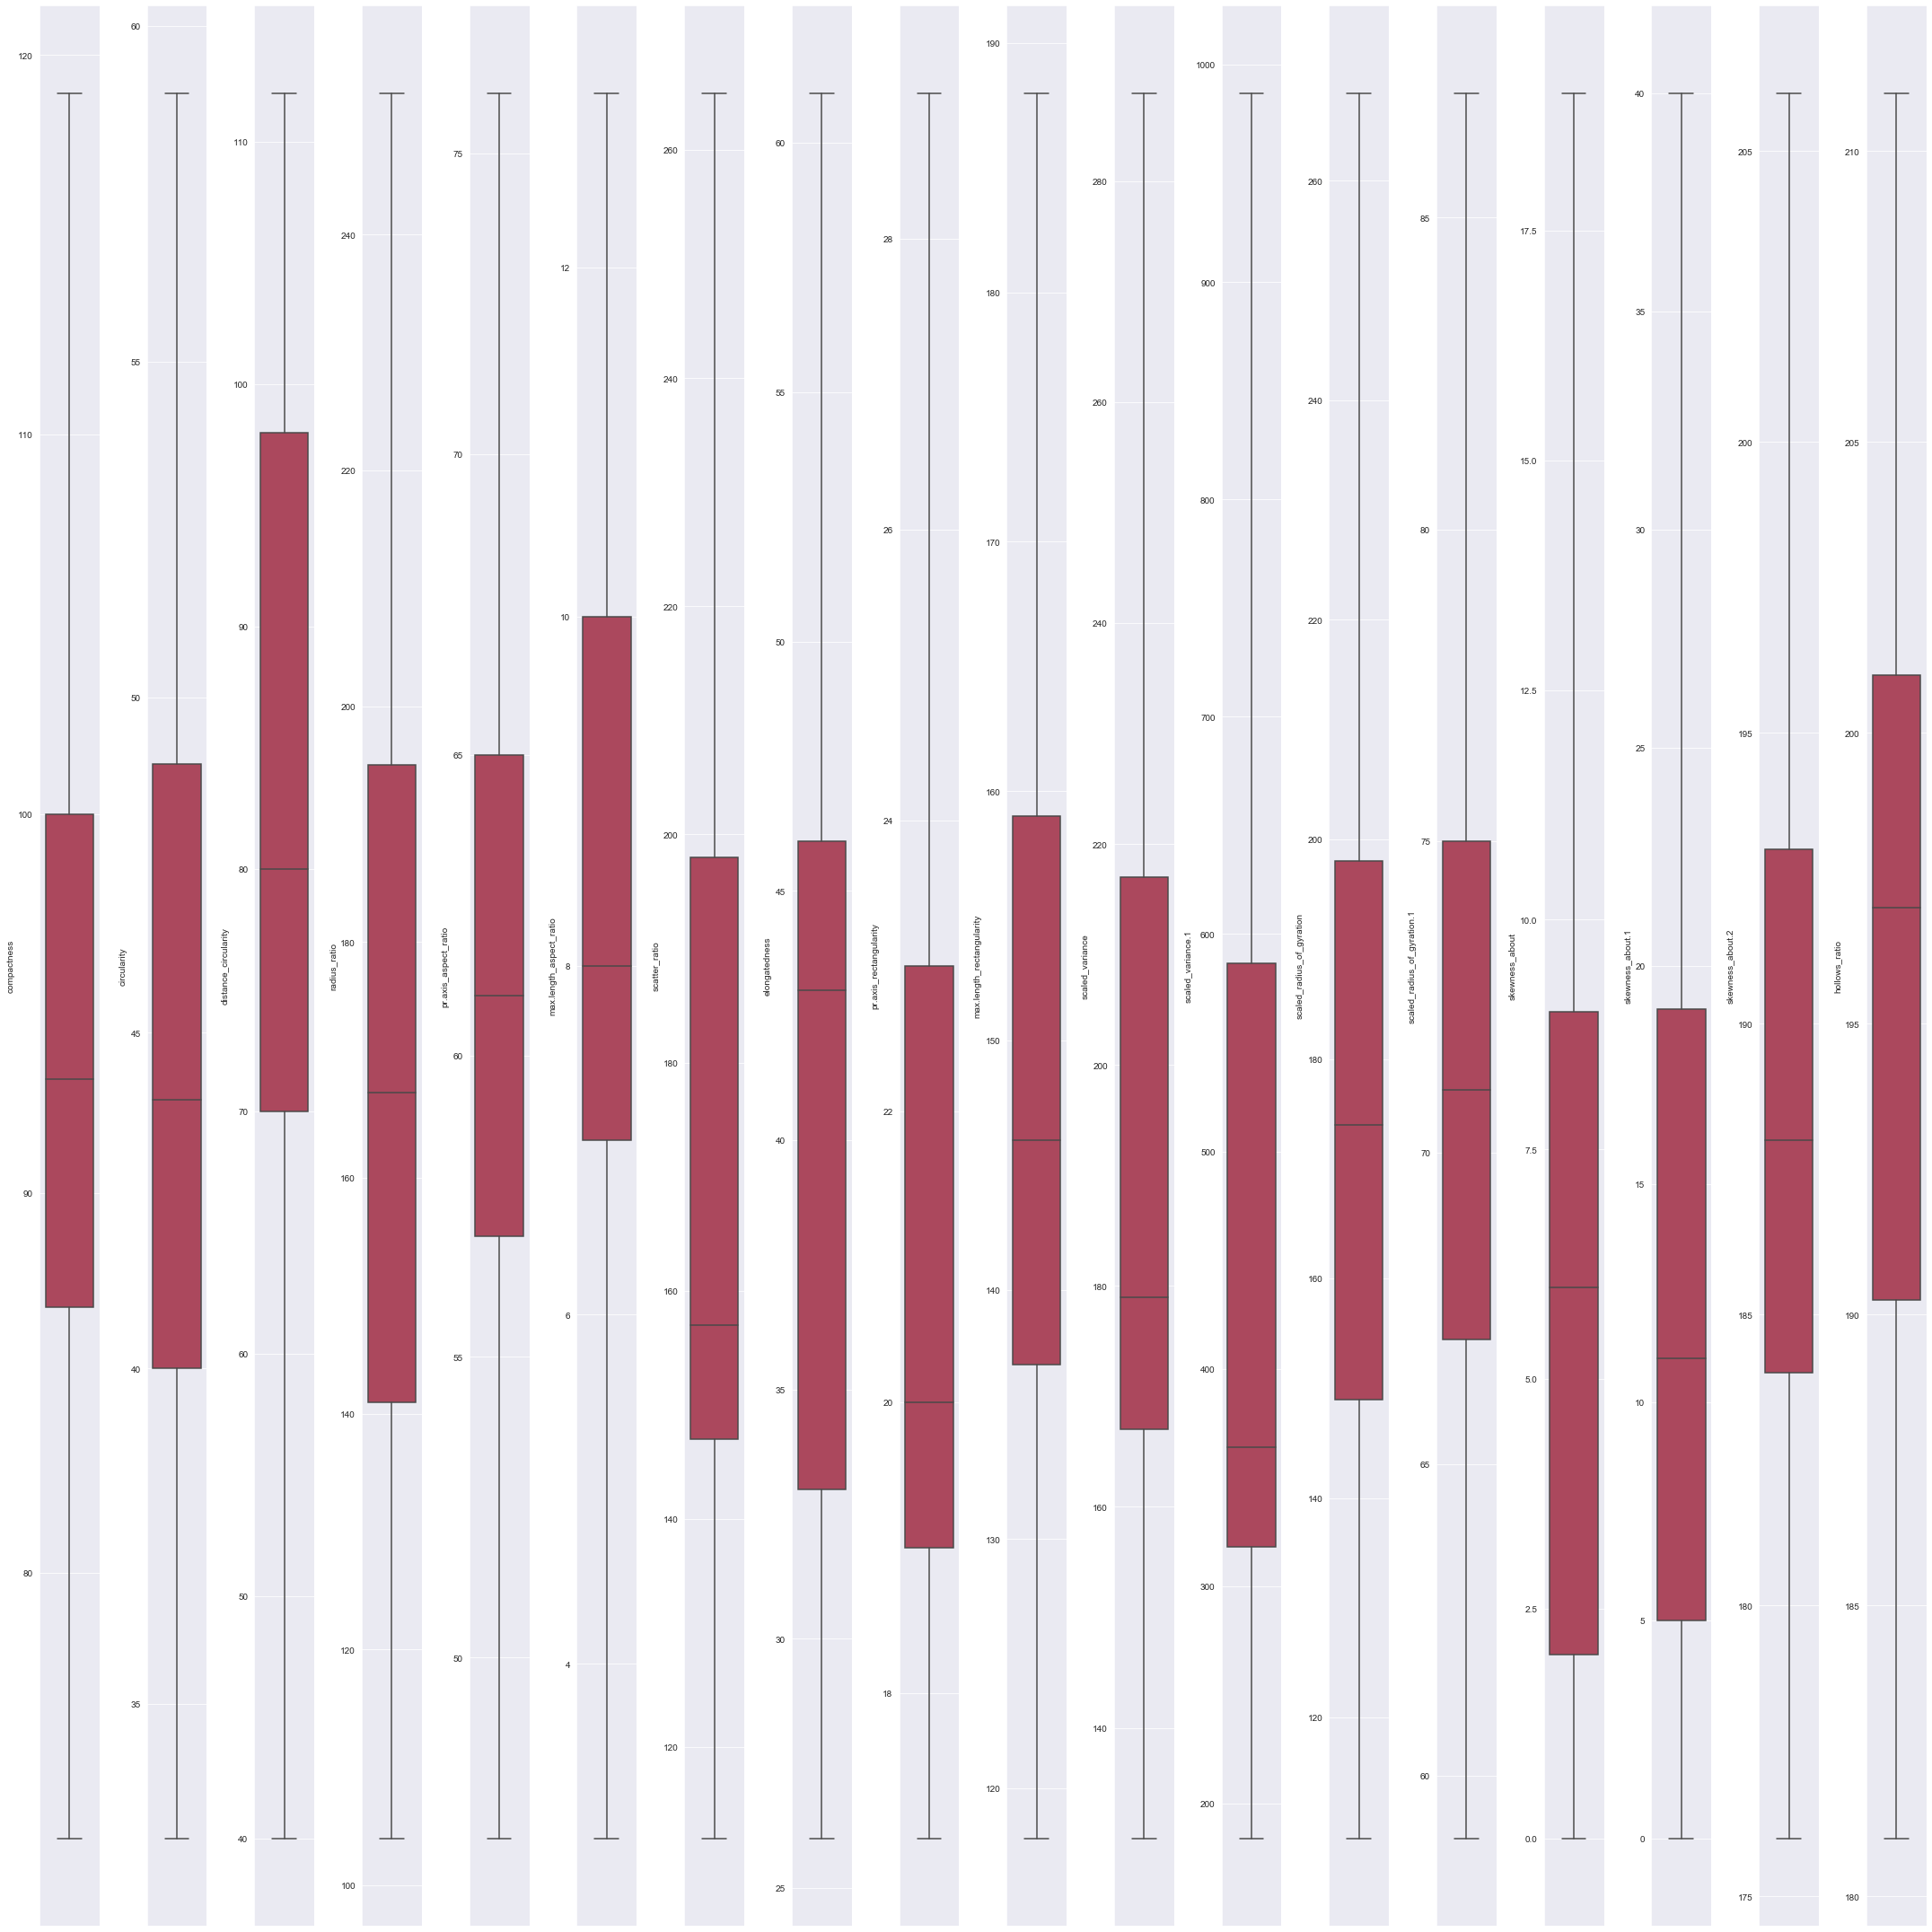

In [15]:
# Check the dataset after Outlier treatment
sns.set_style('darkgrid')
plt.figure(figsize=(30, 30))
index = 1
for col in vehicle.columns[:-1]:
    plt.subplot(1, len(vehicle.columns[:-1]), index)
    sns.boxplot(y=vehicle[col], palette='inferno', fliersize=12)
    index += 1
plt.tight_layout()

Understanding the attributes:
bivariate analysis

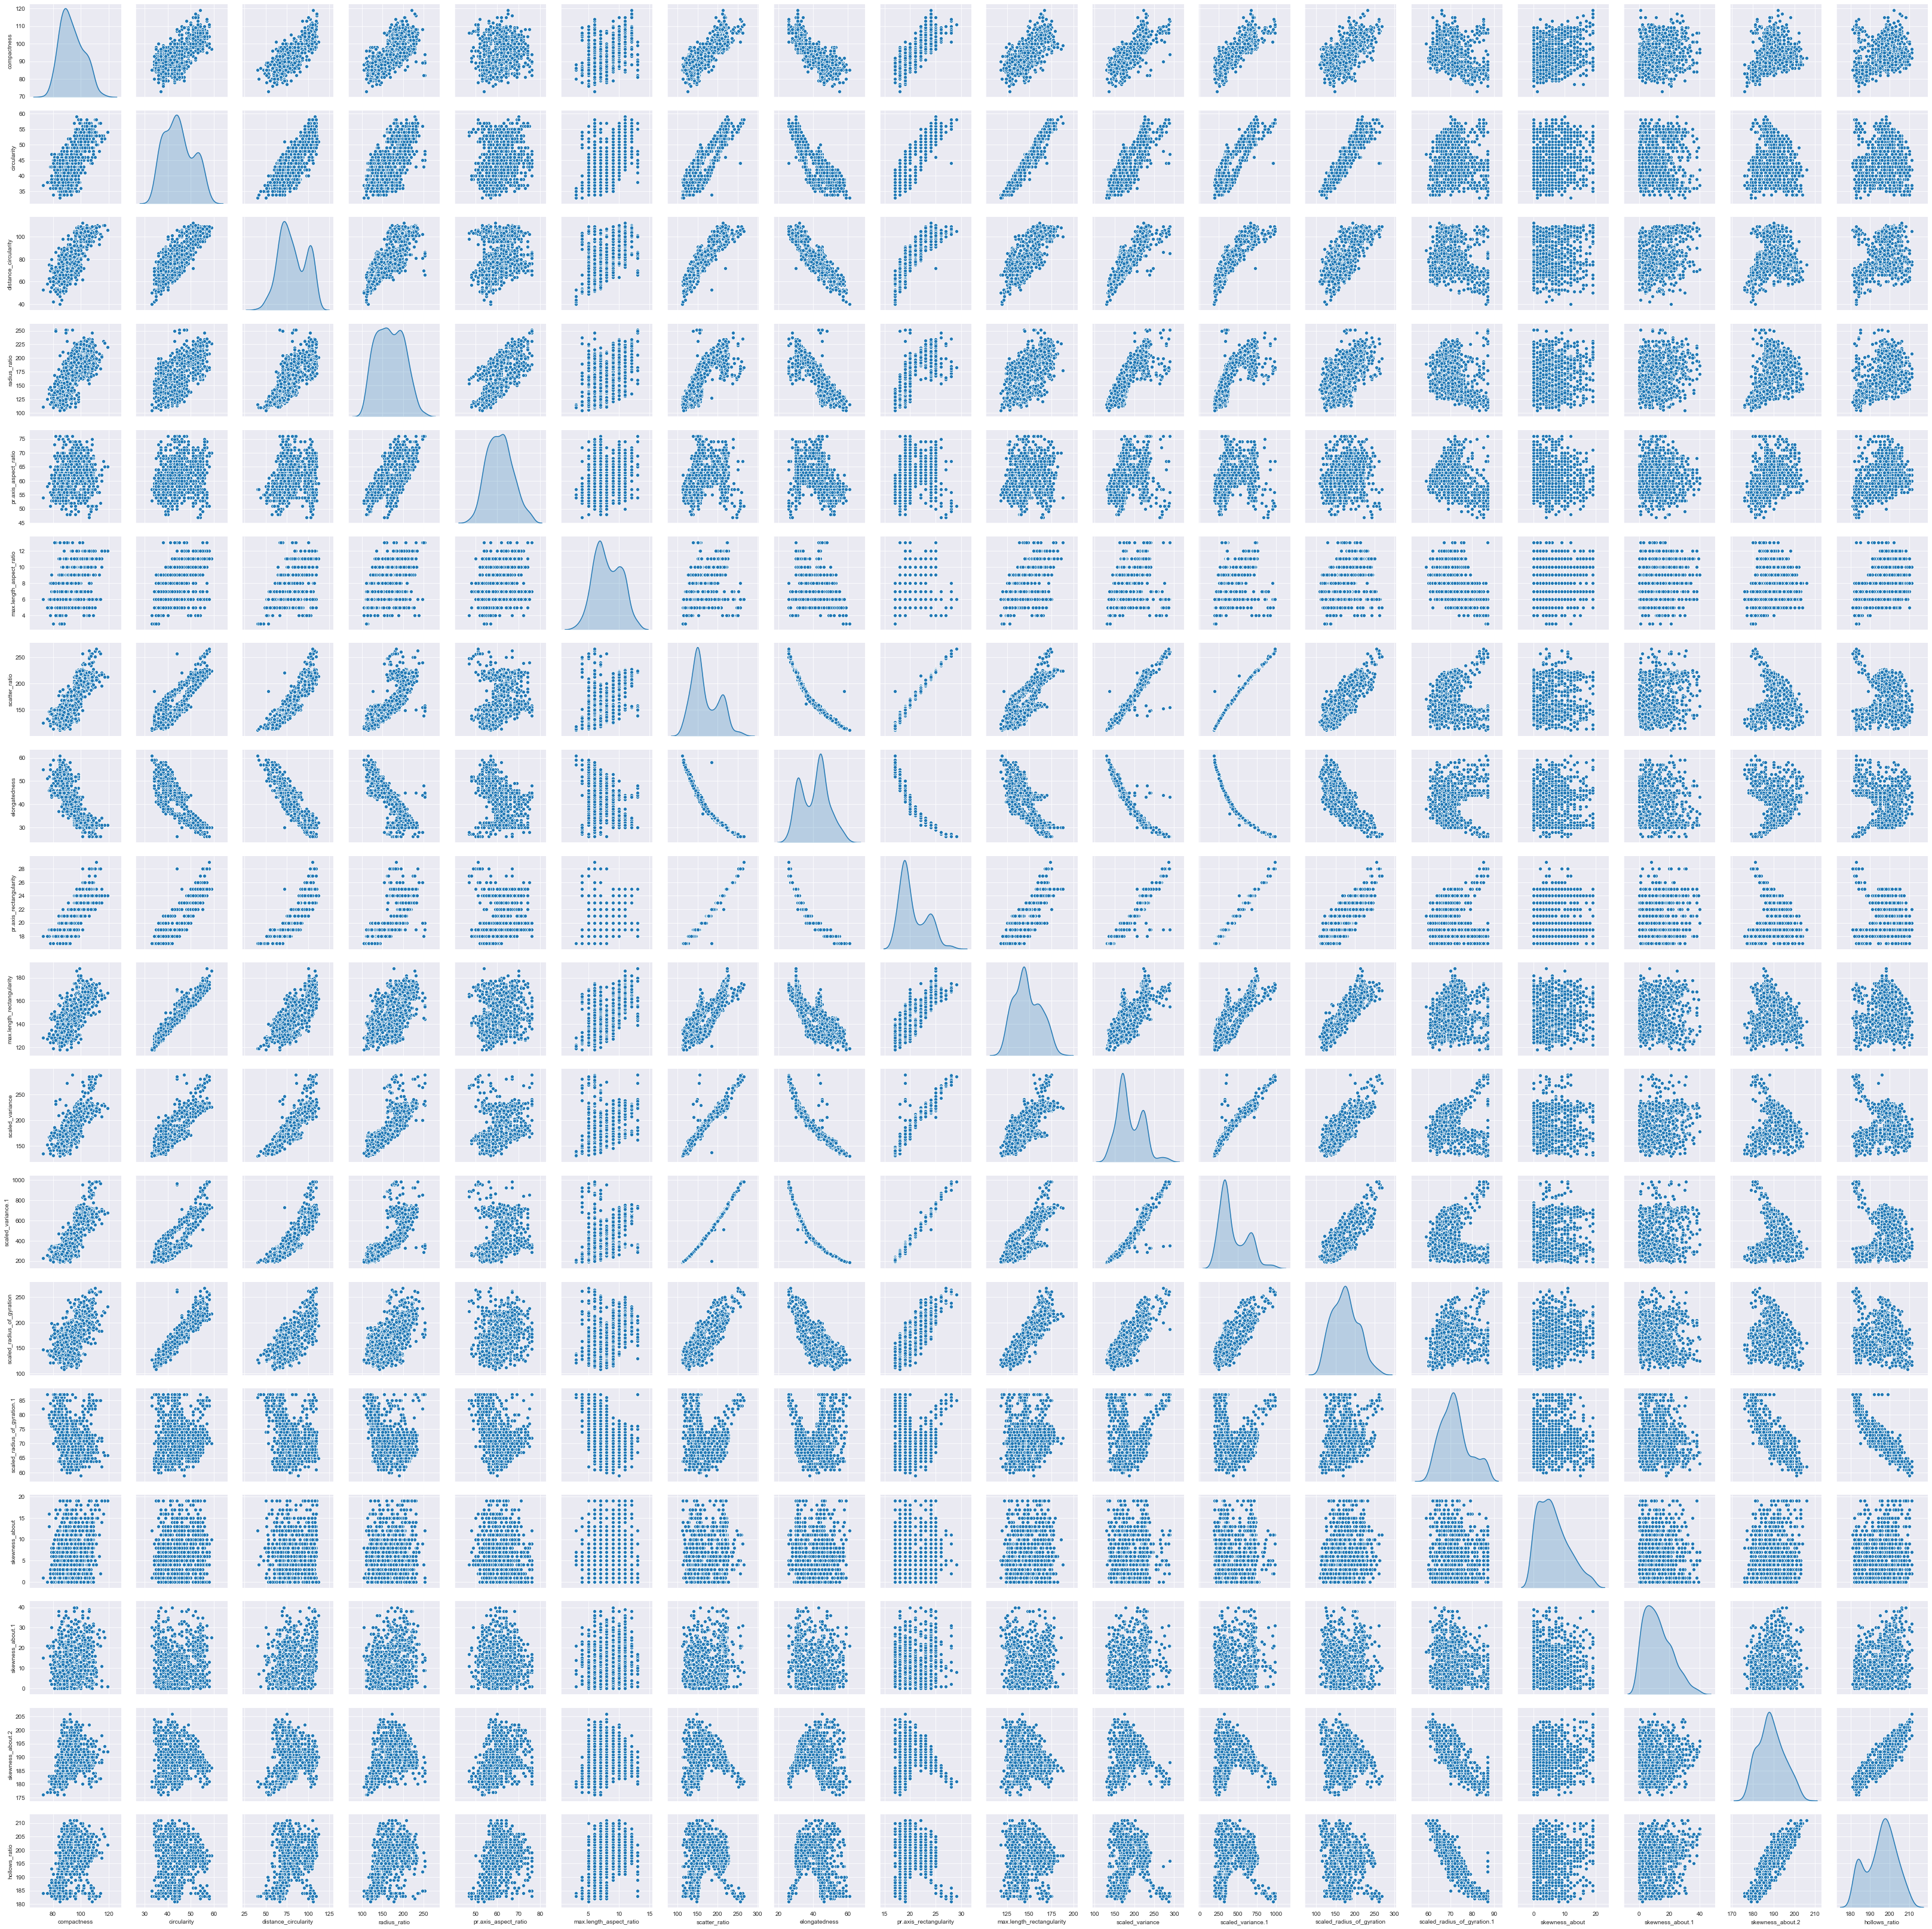

In [16]:
sns.pairplot(vehicle, diag_kind='kde')

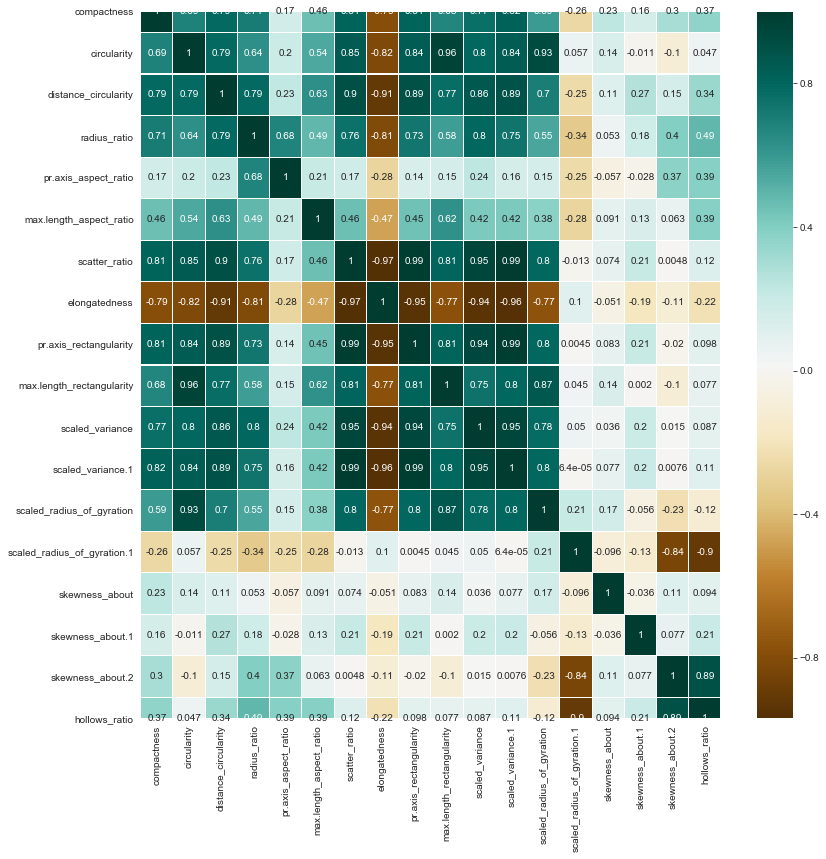

In [17]:
# Visualize the correlation among independent features
plt.figure(figsize=(13,13))
sns.heatmap(vehicle.corr(), annot=True, linewidths=0.1, cmap='BrBG')

Observations:
Most of the features are highly co-related with each other either positively or negatively. This explains there is a higher degree of multi-colinearity present in the dataset.
Only the plots for skewness_about and skewness_about.1 is showing cloud structure across all other features. The heat map for these two features also have all light shades across.
Hence these 2 features have less colinearity with other features. Let's visualize it through regression plots.

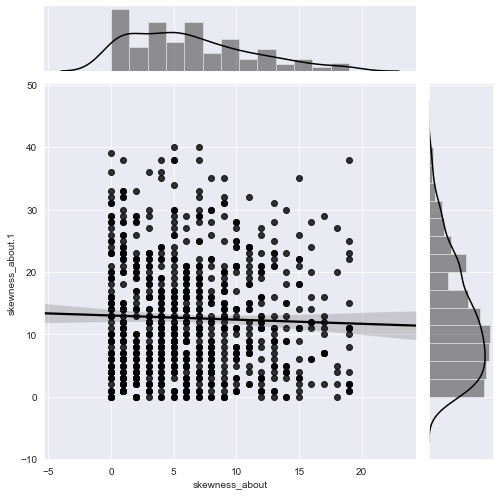

In [18]:
sns.jointplot('skewness_about', 'skewness_about.1', vehicle, kind='reg', height=7, color='k')

Observations:

The parallel regression line shows these 2 features are not co-related with each other also. So, ideally we should exclude them from PCA analysis.
But let's perform Feature Importance analysis to see which features are more important in deciding the target class.

In [19]:
# Divide the dataset into Input features and Target variables
X = vehicle.drop('class', axis=1)
y = vehicle['class']

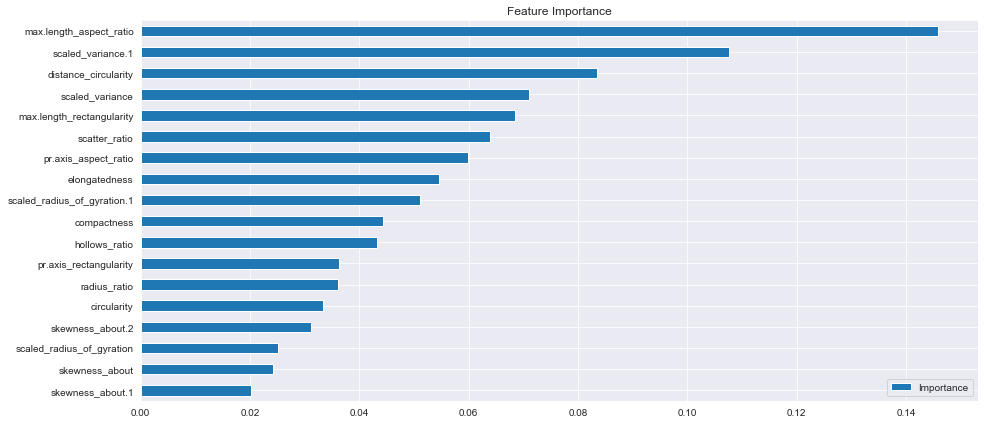

In [20]:
# Feature Importance plot using Random Forest Classifier
rf = RandomForestClassifier().fit(X, y)
pd.DataFrame(rf.feature_importances_, index = vehicle.columns[:-1], 
             columns=['Importance']).sort_values('Importance').plot(kind='barh', figsize=(15,7), title='Feature Importance')

Target variable analysis

In [21]:
# Find count of unique target variable
len(y.unique())
# OR
y.nunique()

3

In [22]:
y.unique()

array(['van', 'car', 'bus'], dtype=object)

In [23]:
y.value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

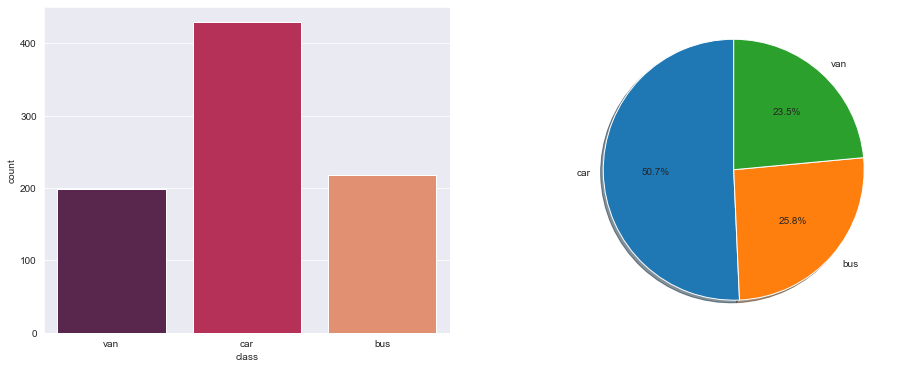

In [24]:
# Check the frequency distribution of each target class
fig, axes = plt.subplots(1, 2, figsize=(16,6))
sns.countplot(y, ax=axes[0], palette='rocket')
_ = axes[1].pie(y.value_counts(), autopct='%1.1f%%', shadow=True, startangle=90, labels=y.value_counts().index)

Observation:

The ratio of car to bus to van in the dataset is close to 2:1:1. Of course the car types vehicles includes 2 different types of cars i.e. Saab 9000 and an Opel Manta 400. Hence we can consider this dataset to be almost balanced dataset in terms target classes.

In [25]:
# Compare class wise mean
pd.pivot_table(vehicle, index='class', aggfunc=['mean']).T

class                                    bus         car         van
mean circularity                   44.963303   46.034965   42.070352
     compactness                   91.591743   96.184149   90.562814
     distance_circularity          76.701835   88.878788   73.256281
     elongatedness                 40.114679   38.088578   47.939698
     hollows_ratio                191.325688  197.582751  196.145729
     max.length_aspect_ratio        6.545872    8.825175    8.592965
     max.length_rectangularity    146.701835  149.967366  145.175879
     pr.axis_aspect_ratio          63.064220   60.993007   60.030151
     pr.axis_rectangularity        20.573394   21.512821   18.572864
     radius_ratio                 165.724771  180.629371  146.130653
     scaled_radius_of_gyration    180.986239  179.613054  157.276382
     scaled_radius_of_gyration.1   76.743119   69.925408   72.206030
     scaled_variance              192.889908  197.932401  163.804020
     scaled_variance.1            448.701835  500.596737  298.201005
     scatter_ratio                170.022936  181.062937  141.537688
     skewness_about                 4.798165    7.062937    6.417085
     skewness_about.1              10.211009   15.165501    9.698492
     skewness_about.2             187.811927  189.473193  188.939698

Observations:

There is not much of variation of any features in all the three vehicle types

Deliverable - 3
Use PCA from scikit learn and elbow plot to find out reduced number of dimension (which covers more than 95% of the variance)
In order to perform PCA we need to do the following:

Standardize the data.
Use the standardized data to create a covariance matrix.
Use the resulting matrix to calculate eigenvectors (principal components) and their corresponding eigenvalues.
Sort the components in decending order by its eigenvalue.
Choose n components which explain the most variance within the data (larger eigenvalue means the feature explains more variance).
Create a new matrix using the n components.
Step 1: Standardize the data
StandardScaler() will normalize the features so that each column/feature/variable will have mean = 0 and standard deviation = 1.

In [26]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.describe().T

count          mean       std       min  \
compactness                  846.0  5.572112e-16  1.000592 -2.512695   
circularity                  846.0 -3.721741e-16  1.000592 -1.929015   
distance_circularity         846.0  3.905465e-16  1.000592 -2.671726   
radius_ratio                 846.0 -1.359564e-16  1.000592 -1.987599   
pr.axis_aspect_ratio         846.0  3.280801e-16  1.000592 -2.469018   
max.length_aspect_ratio      846.0  9.369967e-17  1.000592 -2.411425   
scatter_ratio                846.0 -1.304446e-16  1.000592 -1.715506   
elongatedness                846.0 -4.173179e-16  1.000592 -1.911681   
pr.axis_rectangularity       846.0 -4.776846e-17  1.000592 -1.382277   
max.length_rectangularity    846.0  7.968409e-16  1.000592 -2.067876   
scaled_variance              846.0  0.000000e+00  1.000592 -1.877169   
scaled_variance.1            846.0 -1.858246e-16  1.000592 -1.450461   
scaled_radius_of_gyration    846.0  6.377877e-17  1.000592 -2.020250   
scaled_radius_of_gyration.1  846.0  1.414353e-16  1.000592 -2.043123   
skewness_about               846.0  2.057718e-16  1.000592 -1.313556   
skewness_about.1             846.0 -4.199425e-17  1.000592 -1.412566   
skewness_about.2             846.0  1.375574e-15  1.000592 -2.101254   
hollows_ratio                846.0  1.544470e-15  1.000592 -1.968200   

                                  25%       50%       75%       max  
compactness                 -0.811520 -0.082445  0.768143  3.076880  
circularity                 -0.787223 -0.134771  0.680795  2.311927  
distance_circularity        -0.766353 -0.131229  1.011995  1.901169  
radius_ratio                -0.850489 -0.043756  0.809076  2.560840  
pr.axis_aspect_ratio        -0.742460 -0.051838  0.638785  2.537998  
max.length_aspect_ratio     -0.550476 -0.085239  0.845236  2.240948  
scatter_ratio               -0.660660 -0.359275  0.876403  2.895681  
elongatedness               -1.015254  0.265356  0.649538  2.570453  
pr.axis_rectangularity      -0.609882 -0.223684  0.934909  3.252095  
max.length_rectangularity   -0.758169 -0.137782  0.758332  2.757358  
scaled_variance             -0.692031 -0.307662  0.909507  3.183690  
scaled_variance.1           -0.688676 -0.429073  0.834895  3.106064  
scaled_radius_of_gyration   -0.790504 -0.021913  0.715935  2.867990  
scaled_radius_of_gyration.1 -0.806616 -0.188363  0.429891  2.284651  
skewness_about              -0.898361 -0.067972  0.554820  2.630793  
skewness_about.1            -0.852150 -0.179651  0.717014  3.070761  
skewness_about.2            -0.800130 -0.149568  0.663635  2.777962  
hollows_ratio               -0.723984  0.183957  0.721997  2.067095

In [27]:
# Create a Covariance Matrix
covar_matrix = PCA(n_components=X_scaled.shape[1])
covar_matrix

PCA(copy=True, iterated_power='auto', n_components=18, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [28]:
# Calculate Eigenvalues
covar_matrix.fit(X_scaled)

# calculate variance ratios
var = covar_matrix.explained_variance_ratio_;var

array([5.39141965e-01, 1.83802405e-01, 6.63913246e-02, 6.47470936e-02,
       4.85508291e-02, 4.05950004e-02, 1.86116604e-02, 1.22889234e-02,
       7.21979678e-03, 5.21573613e-03, 3.47395973e-03, 3.10245363e-03,
       2.27000714e-03, 1.66632188e-03, 1.25730188e-03, 1.01160535e-03,
       4.58115343e-04, 1.95500203e-04])

In [29]:
# cumulative sum of variance explained with [n] features
eigen_vals = np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100
np.cumsum(eigen_vals)

array([53.9, 72.3, 78.9, 85.4, 90.3, 94.4, 96.3, 97.5, 98.2, 98.7, 99. ,
       99.3, 99.5, 99.7, 99.8, 99.9, 99.9, 99.9])

Observation:

In the above array we see that the first feature explains roughly 54% of the variance within our data set while the first two explain 72.3% and so on.
If we employ 7 features we capture 96.3% (threshold = 95%) of the variance within the dataset, thus we gain very little by implementing an additional feature (think of this as diminishing marginal return on total variance explained).

In [41]:
#Create the projected features
# Create a new matrix using the n components
X_projected = PCA(n_components=7).fit_transform(X_scaled)
X_projected.shape

(846, 7)

Use the follwoing algorithms and use grid search to find out the best hyper parameters and do cross validation to find the accuracy.

Support Vector Machine
Gaussian Naive Bayes
Random Forest
Generic Section
Section with generic method to build and test the model

In [34]:
# Let's create a generic method to train and test the model
def run_classification(estimator, X_train, X_test, y_train, y_test):
    # train the model
    clf = estimator.fit(X_train, y_train)
    # predict from the claffier
    y_pred = clf.predict(X_test)
    print('*'*100)
    print('Estimator:', clf)
    print('-'*80)
    print('Training accuracy: %.2f%%' % (accuracy_score(y_train, clf.predict(X_train)) * 100))
    print('Testing accuracy: %.2f%%' % (accuracy_score(y_test, y_pred) * 100))
    print('-'*80)
    print('Confusion matrix:\n %s' % (confusion_matrix(y_test, y_pred)))
    print('-'*80)
    print('Classification report:\n %s' % (classification_report(y_test, y_pred)))
    print('*'*100)

Divide both the original and PCA projected datasets into 80:20 ratio for train and test respectively. We will evaluate the model performance using both of the datasets to see the difference

In [35]:
# Divide the original dataset into train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((676, 18), (170, 18), (676,), (170,))

In [36]:
# Divide the projected dataset into train and test split
X_projected_train, X_projected_test, y_train, y_test = train_test_split(X_projected, y, test_size=0.2, random_state=1)
X_projected_train.shape, X_projected_test.shape, y_train.shape, y_test.shape

((676, 7), (170, 7), (676,), (170,))

Model performances on original dataset

In [37]:
# Run Classification for Support Vector Classifier
models = [SVC(), GaussianNB(), RandomForestClassifier()]
_ = [run_classification(model, X_train, X_test, y_train, y_test) for model in models]

****************************************************************************************************
Estimator: SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
--------------------------------------------------------------------------------
Training accuracy: 68.64%
Testing accuracy: 64.12%
--------------------------------------------------------------------------------
Confusion matrix:
 [[18 17  2]
 [ 9 66 15]
 [18  0 25]]
--------------------------------------------------------------------------------
Classification report:
               precision    recall  f1-score   support

         bus       0.40      0.49      0.44        37
         car       0.80      0.73      0.76        90
         van       0.60      0.58      0.59        43

    accuracy                           0.64   

Observations:

The huge difference of the train and test scores of SVC and RandomForest clearly indicates that they are highly overfitted.
Higher dimensionality and multi-colinearity is responsible for these models to overfit.

Model performances after PCA

In [38]:
# Run Classification for Support Vector Classifier
models = [SVC(), GaussianNB(), RandomForestClassifier()]
_ = [run_classification(model, X_projected_train, X_projected_test, y_train, y_test) for model in models]

****************************************************************************************************
Estimator: SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
--------------------------------------------------------------------------------
Training accuracy: 93.93%
Testing accuracy: 93.53%
--------------------------------------------------------------------------------
Confusion matrix:
 [[34  2  1]
 [ 1 83  6]
 [ 0  1 42]]
--------------------------------------------------------------------------------
Classification report:
               precision    recall  f1-score   support

         bus       0.97      0.92      0.94        37
         car       0.97      0.92      0.94        90
         van       0.86      0.98      0.91        43

    accuracy                           0.94   

Observations:

Performance of the models increased prominently due to reduced no of dimensions.
SVC is performing very well among these models.